# Final Project - Zeba Azfar

## Table of Contents
- [Dataset Description](#description)
- [Read and Clean Data](#data_munging)
- [Exploratory Data Analysis](#data_analysis)
- [Regression Model Building](#data_model)
- [Conclusions](#conclusions)
- [References](#references)

<a id='description'></a>
## 1. Dataset Description

Using the Breast Cancer Wisconsin (Diagnostic) dataset for the final project. The source of the data is UCI Machine Learning Repository, a reliable and reputable data source in the machine learning community. 

#### Dataset Information
The dataset is created by Dr. William H Wohlberg, O. L. Mangasarian, and W.N Street at the University of Wisconsin. All the information about the dataset is publicliy available and has been used by other organizations such as universities in the US, National University of Singapore, Microsoft Reserach and more.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass and describe characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T), a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes. 

#### Attribute Information
1) ID number 

2) Diagnosis (M = malignant, B = benign) 

Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter) 

b) texture (standard deviation of gray-scale values) 

c) perimeter 

d) area 

e) smoothness (local variation in radius lengths) 

f) compactness (perimeter^2 / area - 1.0) 

g) concavity (severity of concave portions of the contour) 

h) concave points (number of concave portions of the contour) 

i) symmetry 

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 5 is Mean Perimeter, field 15 is Perimeter SE, field 23 is Perimeter worst.

Number of instances: 569

Number of attributes: 32

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

<a id='data_munging'></a>
## 2. Read and Clean Data

In [105]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy.stats import norm
from scipy.stats import zscore

sns.set(font_scale=1.3)

from sklearn import preprocessing

def read_file(filename, header_val):
    file = pd.read_csv(filename, header=header_val)
    return file

df = read_file("/Users/zebaazfar/Desktop/MSIS502_DataAnalysis/datasets/wdbc.csv", None)

df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


#### Add column names

In [106]:
df.columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
                     'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                     'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                     'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
                     'compactness_se',  'concavity_se', 'concave points_se','symmetry_se',
                     'fractal_dimension_se','radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                     'smoothness_worst', 'compactness_worst', 'concavity_worst',
                     'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
df.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [107]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [108]:
#Number of rows and columns
df.shape

(569, 32)

In [109]:
#check the data types
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [110]:
#check for null values
df.isnull().sum()[0]

0

In [111]:
#check for duplicated rows
sum(df.duplicated())

0

Number of cells diagnosed Benign : 357
Number of cells diagnosed Malignant : 212


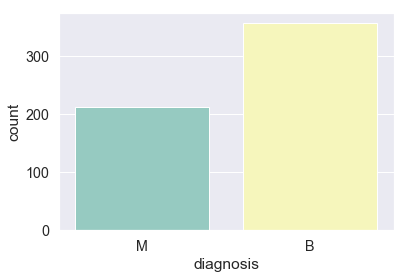

In [112]:
B, M = df.diagnosis.value_counts()
print("Number of cells diagnosed Benign : {}".format(B))
print("Number of cells diagnosed Malignant : {}".format(M))

ax = sns.countplot(x="diagnosis", data=df, palette="Set3")

In [113]:
per_B = B/(B+M)*100
per_M = M/(M+B)*100
print('% of Benign cases: {}'.format(per_B))
print('% of Malignant cases: {}'.format(per_M))

% of Benign cases: 62.741652021089635
% of Malignant cases: 37.258347978910365


#### Observation

The dataset is fairly clean with no missing values and no duplicated ids. The response variable is **diagnosis** which is binary with two classes, **M Malignant and B** Benign. Durig data cleaning process I will change these to binary to use them for data analysis process of finding correlation with the other variables.

Others are exaplanatory variables which are all quantitative, so no need to change the data type.

In [114]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [115]:
#replace whitespaces in column names with '_'
def remove_space(dataf):
    dataf.columns = dataf.columns.str.replace(' ', '_')
    return dataf.columns
remove_space(df)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [116]:
#encoding the diagnosis column
df['diagnosis'] = pd.get_dummies(df['diagnosis'])
df.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,1,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


**M : 0**

**B : 1**

In [117]:
#standard error(se) columns are dependent on the mean columns calculated before
#drop all the se columns
df =df.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se'], axis=1)
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [118]:
#worst columns are a subset of the mean columns so they can be removed too
#drop all the worst columns
cols_worst = ['radius_worst', 
              'texture_worst',
              'perimeter_worst', 
              'area_worst', 
              'smoothness_worst', 
              'compactness_worst', 
              'concavity_worst',
              'concave_points_worst', 
              'symmetry_worst', 
              'fractal_dimension_worst']

df= df.drop(cols_worst, axis=1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [119]:
df.shape

(569, 12)

<a id='data_analysis'></a>
## 3. Exploratory Data Analysis

In [120]:
df.groupby(['diagnosis']).mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,,,,,,,,,,,
0,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680
1,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867


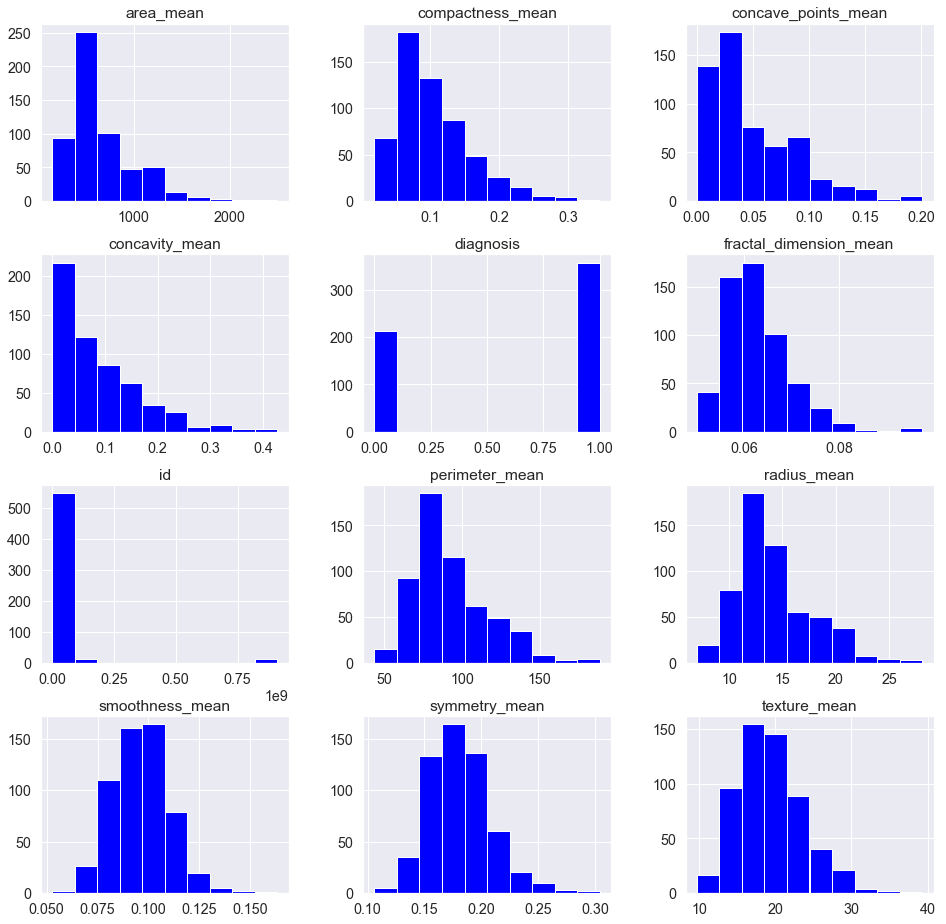

In [121]:
#histogram of the numerical columns
df.hist(color='blue',figsize=(16, 16))
plt.show()

#### Density Plots

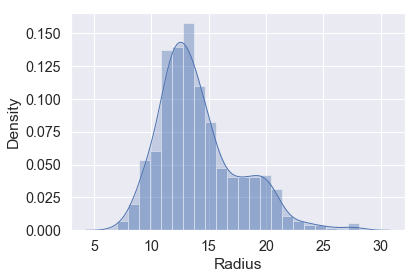

In [122]:
sns.distplot(df['radius_mean'], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})
plt.xlabel('Radius')
plt.ylabel('Density')
plt.show()

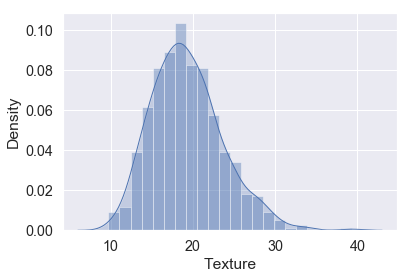

In [123]:
sns.distplot(df['texture_mean'], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})
plt.xlabel('Texture')
plt.ylabel('Density')
plt.show()

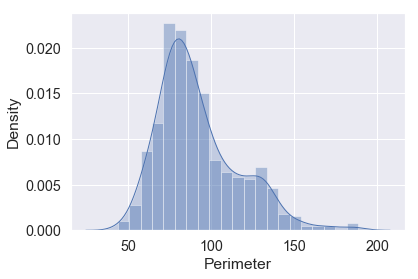

In [124]:
sns.distplot(df['perimeter_mean'], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})
plt.xlabel('Perimeter')
plt.ylabel('Density')
plt.show()

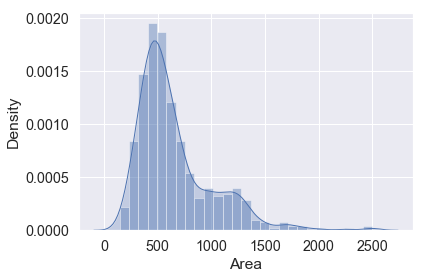

In [125]:
sns.distplot(df['area_mean'], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})
plt.xlabel('Area')
plt.ylabel('Density')
plt.show()

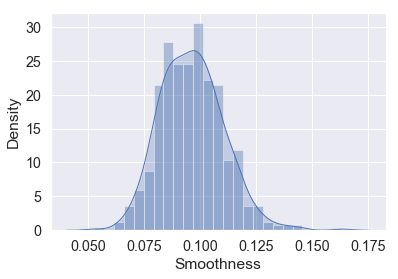

In [126]:
sns.distplot(df['smoothness_mean'], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})
plt.xlabel('Smoothness')
plt.ylabel('Density')
plt.show()

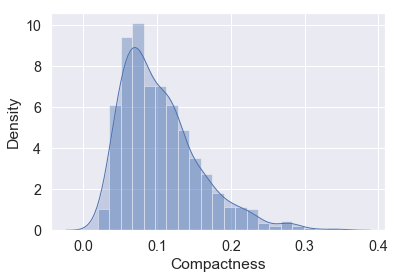

In [127]:
sns.distplot(df['compactness_mean'], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})
plt.xlabel('Compactness')
plt.ylabel('Density')
plt.show()

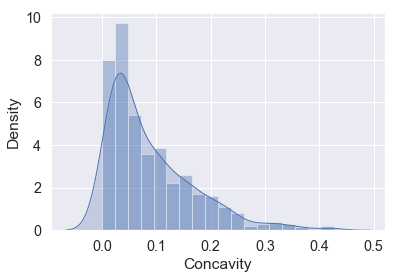

In [128]:
sns.distplot(df['concavity_mean'], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})
plt.xlabel('Concavity')
plt.ylabel('Density')
plt.show()

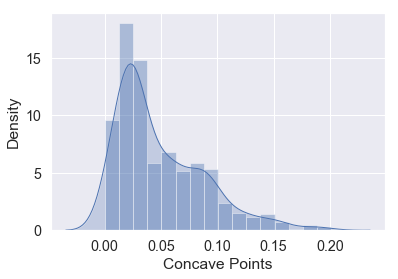

In [129]:
sns.distplot(df['concave_points_mean'], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})
plt.xlabel('Concave Points')
plt.ylabel('Density')
plt.show()

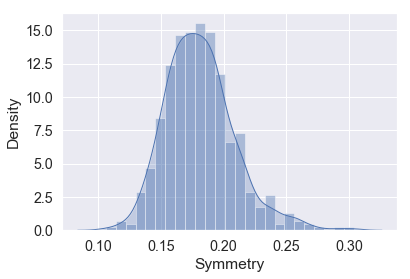

In [130]:
sns.distplot(df['symmetry_mean'], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})
plt.xlabel('Symmetry')
plt.ylabel('Density')
plt.show()

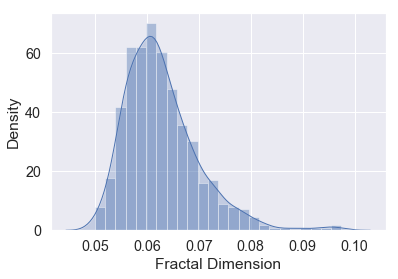

In [131]:
sns.distplot(df['fractal_dimension_mean'], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})
plt.xlabel('Fractal Dimension')
plt.ylabel('Density')
plt.show()

#### Standardization

In [132]:
cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']


standard_scaler = preprocessing.StandardScaler()
standard_df = standard_scaler.fit_transform(df[cols])
df_standard = pd.DataFrame(standard_df)
df_standard.columns = cols
df_standard.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,1.490704e-16,2.544342e-16,-1.338511e-16,-8.429110e-17,2.081912e-16,5.408679e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00


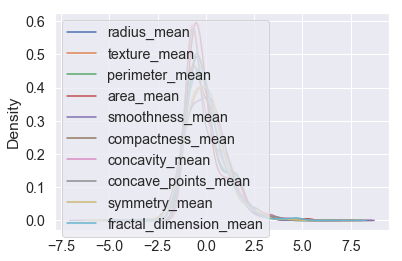

In [133]:
df_standard.plot(kind='density')

#### Scaling

In [134]:
min_max_scaler = preprocessing.MinMaxScaler()

scale_df = min_max_scaler.fit_transform(df[cols])
df_scale = pd.DataFrame(scale_df)
df_scale.columns = cols
df_scale.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


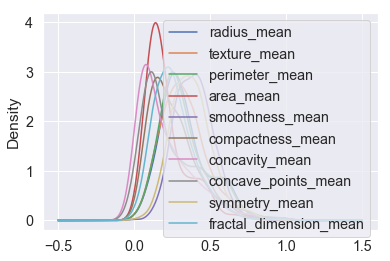

In [135]:
df_scale.plot(kind='density')

#### Observation

It is evident from the histograms and density plot that the data is **positively skewed** and follows a **log normal distribution**. 

Standardzing the data did not bring the mean value to 0, confirms that the **data is not normally distributed**.

#### Examine Correlation

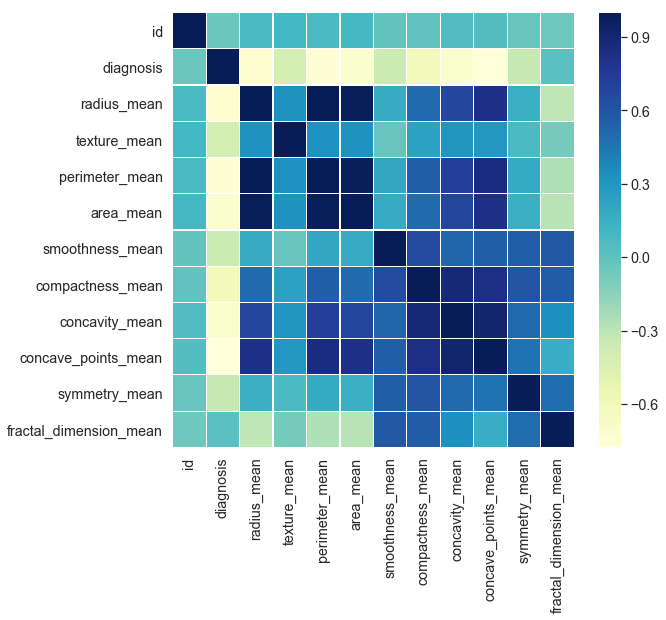

In [136]:
#Correlation between the numeric columns and the response variable
corr_mat = df._get_numeric_data().corr()

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr_mat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [137]:
#look at the correlation values of the above mentioned variables
df[['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 
    'concavity_mean', 'concave_points_mean']].corr() 

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean
diagnosis,1.000000,-0.730029,-0.742636,-0.708984,-0.596534,-0.696360,-0.776614
radius_mean,-0.730029,1.000000,0.997855,0.987357,0.506124,0.676764,0.822529
perimeter_mean,-0.742636,0.997855,1.000000,0.986507,0.556936,0.716136,0.850977
area_mean,-0.708984,0.987357,0.986507,1.000000,0.498502,0.685983,0.823269
compactness_mean,-0.596534,0.506124,0.556936,0.498502,1.000000,0.883121,0.831135
concavity_mean,-0.696360,0.676764,0.716136,0.685983,0.883121,1.000000,0.921391
concave_points_mean,-0.776614,0.822529,0.850977,0.823269,0.831135,0.921391,1.000000


#### Observation

Strong correlation: **>= 0.6 and <= -0.6**

It appears that **diagnosis** has a strong correlation with these 6 variables: **radius_mean, area_mean, perimeter_mean, compactness_mean, concavity_mean, & concave_points_mean**.

We can also see that some features are highly correlated too but we look at them before building the model

#### Test for normality

Checking normality of the featuers that are highly correlated with diagnosis

#### Radius

In [138]:
from scipy.stats import shapiro

# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df['radius_mean'])
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9410696029663086, Pvalue= 3.1061551985026026e-14
Sample does not look Gaussian (reject H0)


In [139]:
from scipy.stats import normaltest

# radius_mean
k_stat, p = normaltest(df['radius_mean'])
print('K^2 Stat= {}, Pvalue= {}'.format(k_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 73.17938185797058, Pvalue= 1.286172249506454e-16
Sample does not look Gaussian (reject H0)


In [140]:
from scipy.stats import anderson

# anderson test
result = anderson(df['radius_mean'])

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))
        
        

Test Statistic: 10.823153591015966
Significance: 15.0 
 Pval cutoff: 0.572 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.651 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.782 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.912 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.084 - Data does not look normal (reject H0)


#### Perimeter

In [141]:
# perimeter_mean
kp_stat, p = normaltest(df['perimeter_mean'])
print('K^2 Stat= {}, Pvalue= {}'.format(kp_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 80.33371758248074, Pvalue= 3.595463394731772e-18
Sample does not look Gaussian (reject H0)


In [142]:
# run shapiro test and return the test stat and p value
Wp_stat, p = shapiro(df['perimeter_mean'])
print("W-statistic= {}, Pvalue= {}".format(Wp_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9361826181411743, Pvalue= 7.01163031715385e-15
Sample does not look Gaussian (reject H0)


In [143]:
# anderson test
result_p = anderson(df['perimeter_mean'])

print('Test Statistic: {}'.format(result_p.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))      

Test Statistic: 11.502471936983738
Significance: 15.0 
 Pval cutoff: 0.572 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.651 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.782 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.912 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.084 - Data does not look normal (reject H0)


#### Area

In [144]:
# area_mean
k_stat, p = normaltest(df['area_mean'])
print('K^2 Stat= {}, Pvalue= {}'.format(k_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 191.6778773687591, Pvalue= 2.3860403182400484e-42
Sample does not look Gaussian (reject H0)


In [145]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df['area_mean'])
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.8584018349647522, Pvalue= 3.196511088521129e-22
Sample does not look Gaussian (reject H0)


In [146]:
result = anderson(df['area_mean'])

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))      

Test Statistic: 23.509675803695245
Significance: 15.0 
 Pval cutoff: 0.572 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.651 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.782 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.912 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.084 - Data does not look normal (reject H0)


#### Compactness

In [147]:
# compactness_mean
kc_stat, p_c = normaltest(df['compactness_mean'])
print('K^2 Stat= {}, Pvalue= {}'.format(kc_stat, p_c))
# interpret
alpha = 0.05
if p_c > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 113.11820358995082, Pvalue= 2.7333433490329536e-25
Sample does not look Gaussian (reject H0)


In [148]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df['compactness_mean'])
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9169784784317017, Pvalue= 3.967941392408286e-17
Sample does not look Gaussian (reject H0)


In [149]:
result = anderson(df['compactness_mean'])

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))

Test Statistic: 11.500271178848948
Significance: 15.0 
 Pval cutoff: 0.572 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.651 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.782 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.912 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.084 - Data does not look normal (reject H0)


#### Concavity

In [150]:
# concavity_mean
kco_stat, p_co = normaltest(df['concavity_mean'])
print('K^2 Stat= {}, Pvalue= {}'.format(kco_stat, p_co))
# interpret
alpha = 0.05
if p_co > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 141.50770215049243, Pvalue= 1.8706515779247436e-31
Sample does not look Gaussian (reject H0)


In [151]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df['concavity_mean'])
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.8668309450149536, Pvalue= 1.3385831077542155e-21
Sample does not look Gaussian (reject H0)


In [152]:
result = anderson(df['concavity_mean'])

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))

Test Statistic: 21.662255184920696
Significance: 15.0 
 Pval cutoff: 0.572 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.651 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.782 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.912 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.084 - Data does not look normal (reject H0)


#### Concave Points

In [153]:
# concave_points_mean
kcp_stat, p_cp = normaltest(df['concave_points_mean'])
print('K^2 Stat= {}, Pvalue= {}'.format(kcp_stat, p_cp))
# interpret
alpha = 0.05
if p_cp > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 101.08583583151744, Pvalue= 1.120700717286823e-22
Sample does not look Gaussian (reject H0)


In [154]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df['concave_points_mean'])
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.8916499018669128, Pvalue= 1.4044357116065472e-19
Sample does not look Gaussian (reject H0)


In [155]:
result = anderson(df['concave_points_mean'])

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))

Test Statistic: 19.257131568941304
Significance: 15.0 
 Pval cutoff: 0.572 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.651 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.782 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.912 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.084 - Data does not look normal (reject H0)


#### Test for Outliers

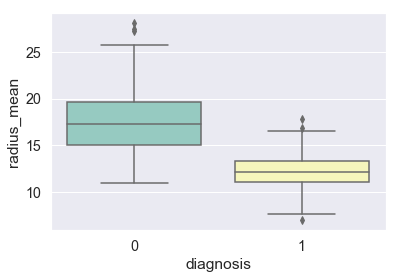

In [156]:
sns.boxplot(x='diagnosis', y='radius_mean', data=df, palette="Set3")
plt.show()

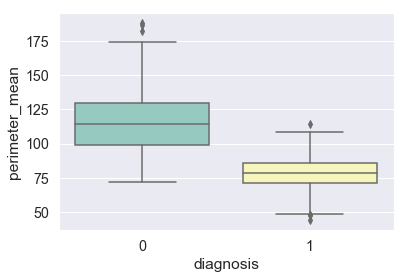

In [157]:
sns.boxplot(x='diagnosis', y= 'perimeter_mean', data=df, palette="Set3")
plt.show()

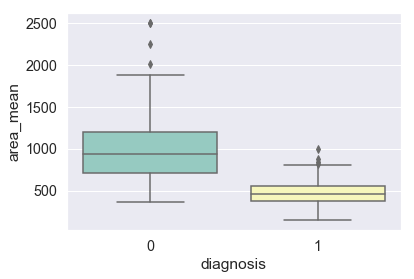

In [158]:
sns.boxplot(x='diagnosis', y= 'area_mean', data=df, palette="Set3")
plt.show()

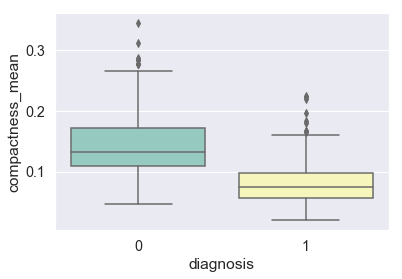

In [159]:
sns.boxplot(x='diagnosis', y= 'compactness_mean', data=df, palette="Set3")
plt.show()

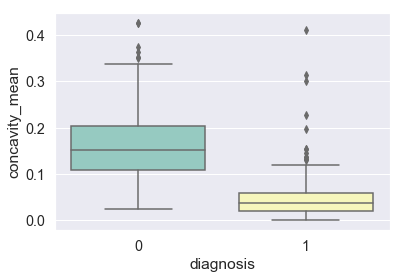

In [160]:
sns.boxplot(x='diagnosis', y= 'concavity_mean', data=df, palette="Set3")
plt.show()

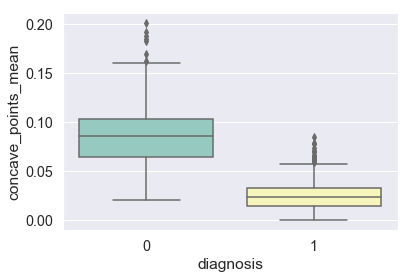

In [161]:
sns.boxplot(x='diagnosis', y= 'concave_points_mean', data=df, palette="Set3")
plt.show()

In [162]:
#Using Zscore to detect outliers for one of the columns with the strongest relation to diagnosis
df['Zscore'] = zscore(df['area_mean'])
df[['Zscore','area_mean']].head(10)

,Zscore,area_mean
0,0.984375,1001.0
1,1.908708,1326.0
2,1.558884,1203.0
3,-0.764464,386.1
4,1.826229,1297.0
5,-0.505650,477.1
6,1.095295,1040.0
7,-0.218965,577.9
8,-0.384207,519.8
9,-0.509063,475.9


In [163]:
#count the number of outliers
df[abs(df.Zscore) > 2.5].count()[1]

13

In [164]:
#create a new dataframe without these outliers
df1 = df[abs(df.Zscore) < 2.5]
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,Zscore
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.984375
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1.908708
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1.558884
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,-0.764464
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1.826229


In [165]:
df1.shape

(556, 13)

<a id='data_model'></a>
## 4. Regression Model Building

#### Create two datasets
Create one dataframe to hold the features, and one dataframe to hold the target:

In [166]:
#Dataframe that holds features
cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']

#dataset of only the featuers
df1_x = pd.DataFrame(df1,
                 columns=cols)
df1_x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [167]:
#dataframe that holds the response vaariable
df1_y = pd.DataFrame(df1, columns=['diagnosis'])
df1_y.head()

,diagnosis
0,0
1,0
2,0
3,0
4,0


#### Check for linear relationships

Check for potential linear relationships between each feature and diagnosis to see if any features should be eliminated. 

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


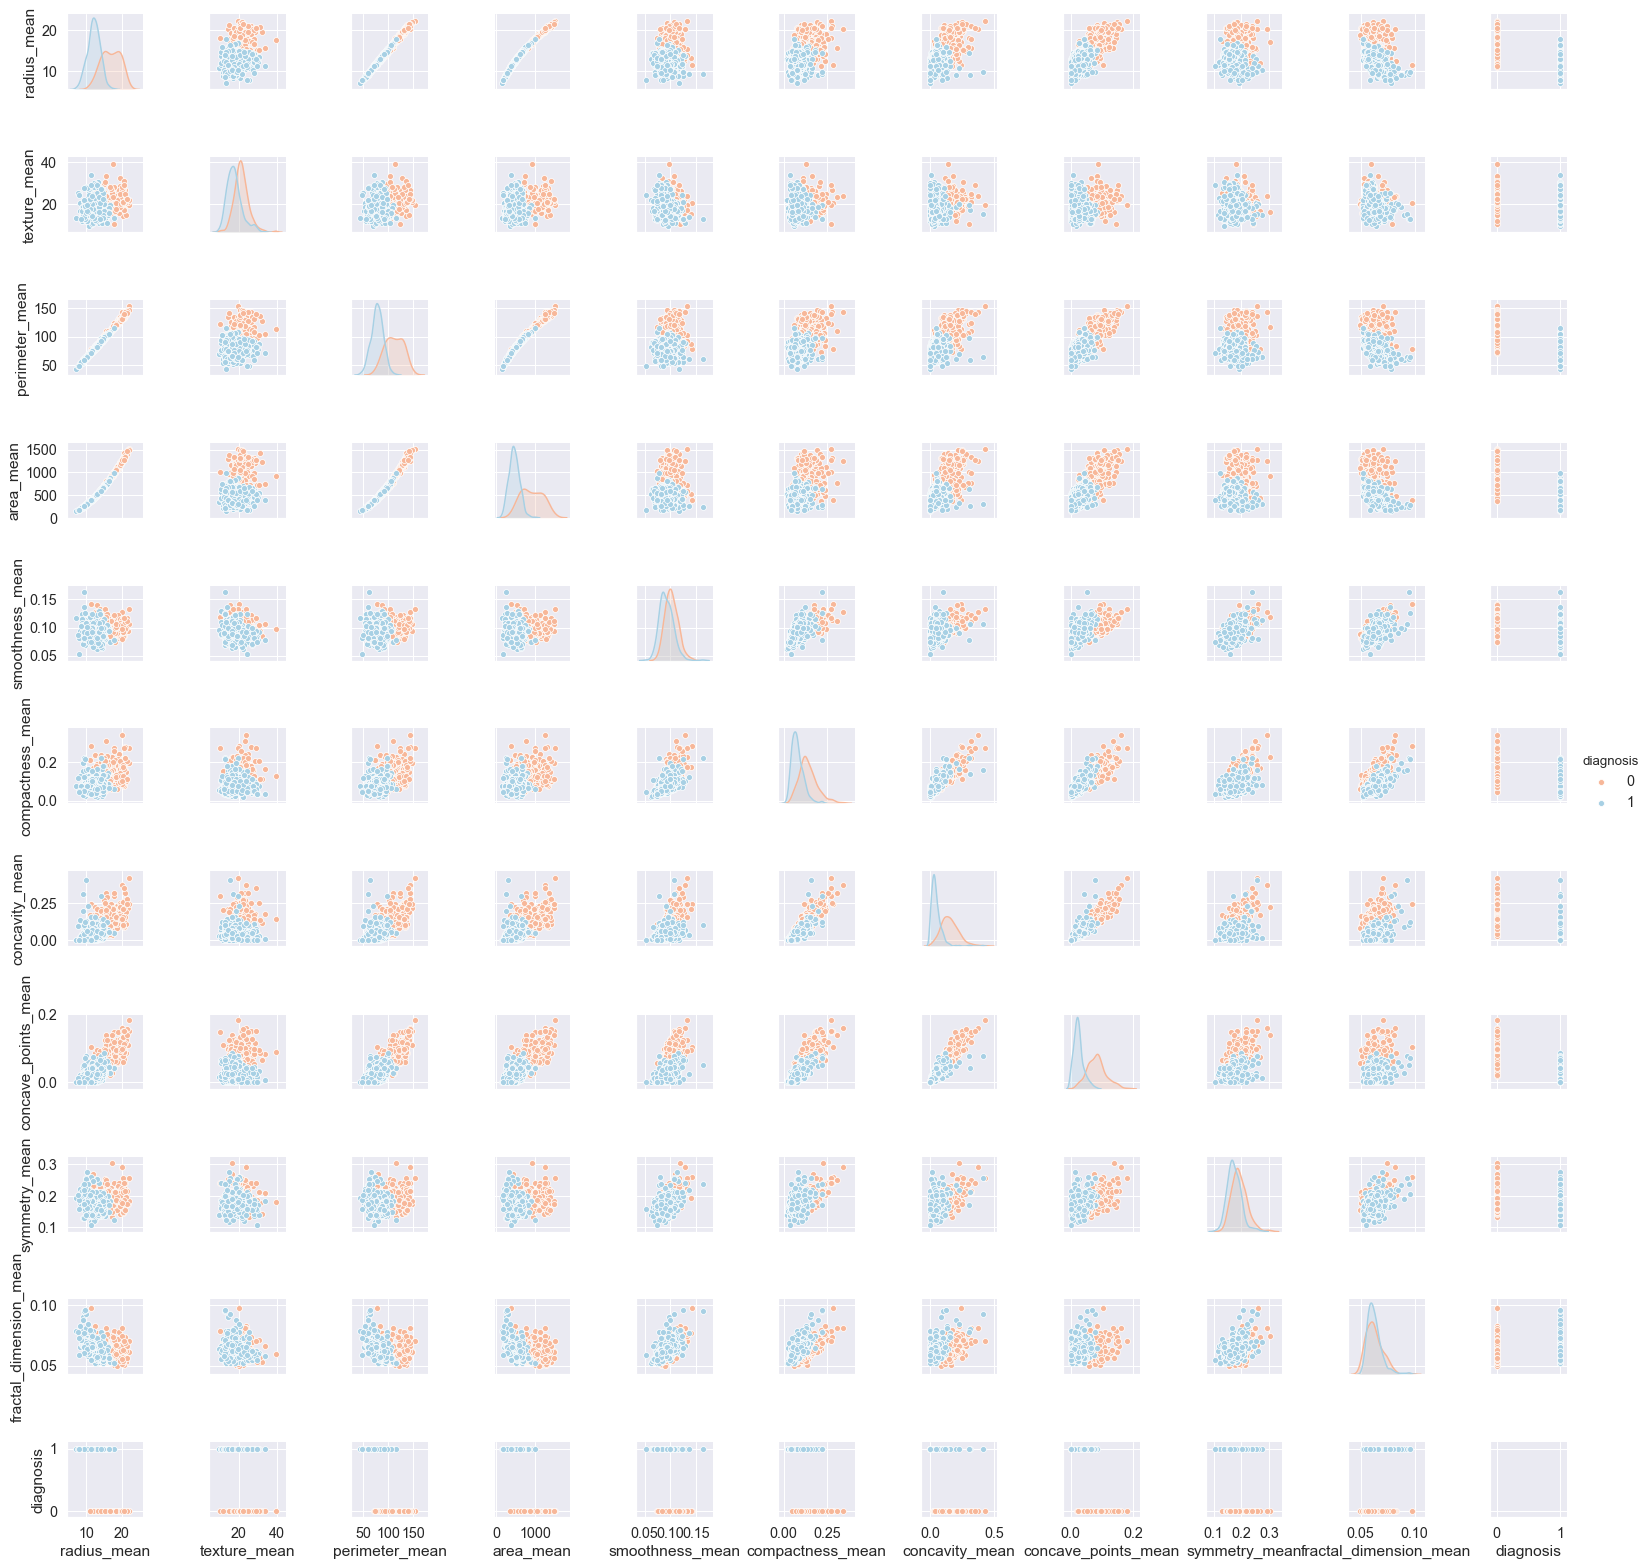

In [168]:
#f, ax = plt.subplots(figsize=(5, 6))
sns.pairplot(data=df1[['radius_mean', 'texture_mean', 'perimeter_mean','area_mean',
                      'smoothness_mean', 'compactness_mean', 'concavity_mean',
                      'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                      'diagnosis']], hue='diagnosis', palette='RdBu', height=2)
plt.show()

#### Check for Multicolinearity
We need to check the remaining variables to make sure they are independent of each. This means that none of the other features are highly correlated with each other.

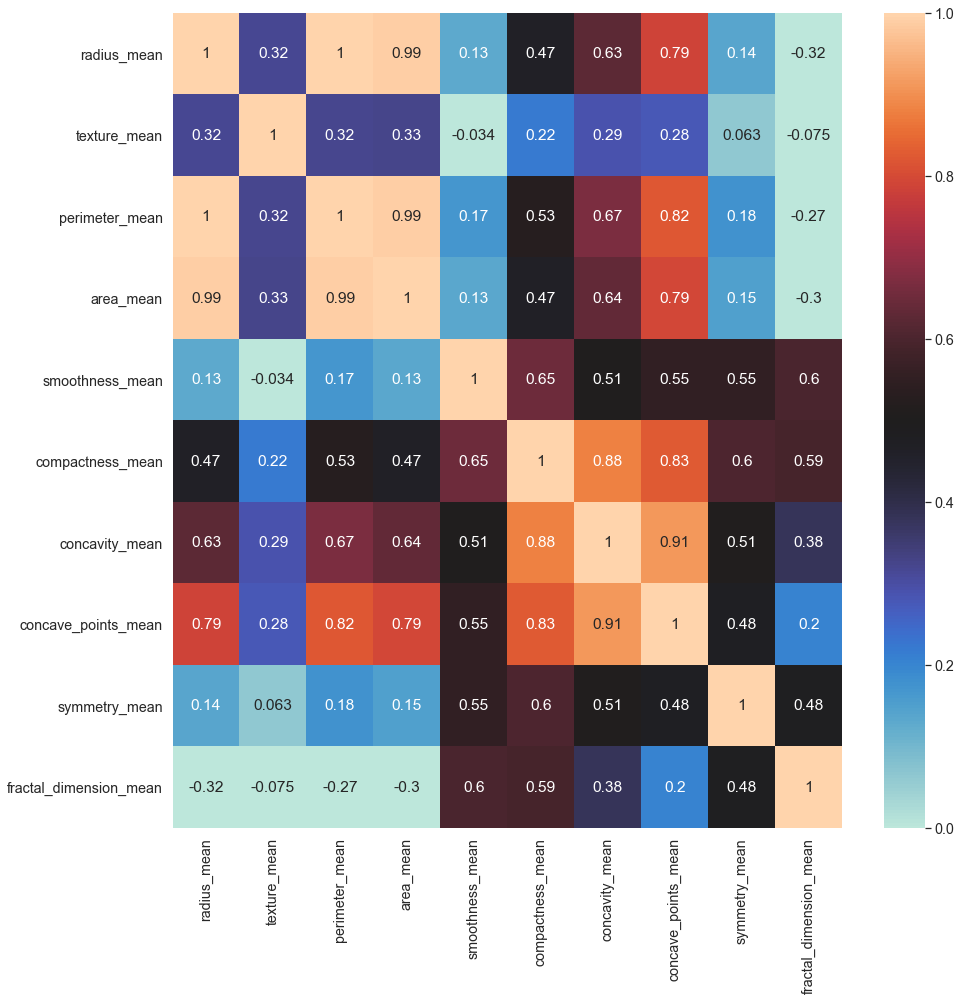

In [169]:
corr = df1_x.corr()# calc correlation on your subset
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(corr, 
            vmin=0, vmax=1, # setting min and max probability
            center=0.5, # changing to peach for high correlation, blue for low
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax, annot=True)
plt.show()

#### Observation

**Radius, perimeter, and area** have strong correlations which is expected as perimeter = 2*pi*radius and area = pi*radius^2. So, we can remove perimeter and area from our dataset.

Similary, **concavity, concave points, and compactness** show multicolinearity, since concavity has the strongest correlation with the other two, I will remove it. 

In [170]:
df1_x = df1_x.drop(['radius_mean', 'perimeter_mean', 'concavity_mean'],
               axis=1)
df1_x.head()

,texture_mean,area_mean,smoothness_mean,compactness_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,10.38,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871
1,17.77,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667
2,21.25,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999
3,20.38,386.1,0.14250,0.28390,0.10520,0.2597,0.09744
4,14.34,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883


In [171]:
df1_x.head()

,texture_mean,area_mean,smoothness_mean,compactness_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,10.38,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871
1,17.77,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667
2,21.25,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999
3,20.38,386.1,0.14250,0.28390,0.10520,0.2597,0.09744
4,14.34,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883


In [172]:
df1_x.columns

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

#### Observation
None of the features have a linear relationship with diagnosis as seen from the graph, so I will select all the features in my model.

#### Create training and testing datasets
Pull out 20% of the data for testing

In [173]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1_x, df1_y, # dataframes here,  
                                                   test_size=0.20,  # pull out 20% here, 
                                                   random_state=40)

#### Instantiate the Model Object
Create the sklearn logistic regression object that allows us to use logistic regression methods and access attributes: 

In [174]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#### Train your model & make predictions
Now I will train (fit) the model to our training set. 

In [216]:
fit = model.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Make Predictions
Once trained my model on the training set, I will use it to make predictions with the test set: 

In [217]:
preds = fit.predict(x_test) # predict labels for x
preds[1:6]

array([0, 1, 0, 1, 0], dtype=uint8)

In [218]:
preds = np.reshape(preds, (112,1))
preds[1:6]

array([[0],
       [1],
       [0],
       [1],
       [0]], dtype=uint8)

Text(0, 0.5, 'Predicted Values')

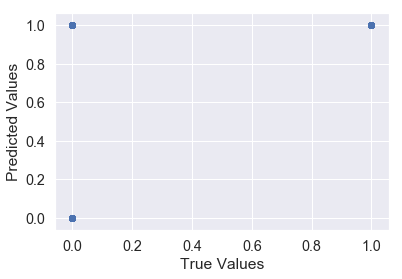

In [219]:
# plot your predictions against your actual values
plt.scatter(y_test, preds)#plot test ground truth vs predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
#plt.show()

In [220]:
print('Aaccuracy of logistic regression on the test data is: {:.3f}'
      .format(fit.score(x_test, y_test)))

Aaccuracy of logistic regression on the test data is: 0.857


#### Plot Residuals
Before evaluating the model results, we need to make sure that the residuals do not show any patterns.  

Text(0, 0.5, 'Residuals')

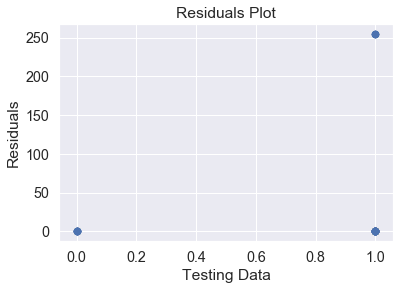

In [221]:
residuals = y_test - preds# calculate residuals
plt.scatter(model.predict(x_test), residuals,
            c='b', s=40, alpha=0.5) # plot x_test vs residuals
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

#### Model Evaluation

In [222]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

print(confusion_matrix(y_test, preds))

print(precision_score(y_test, preds))

print(recall_score(y_test, preds))

print(accuracy_score(y_test, preds))

print(f1_score(y_test, preds))

[[30 16]
 [ 0 66]]
0.8048780487804879
1.0
0.8571428571428571
0.8918918918918919


****True Negative**** : 30

****False Positive**** : 16

****False Negative**** : 0

****True Positive**** : 66

- Precision (P) is defined as the number of true positives (Tp) over the number of true positives (Tp) plus the number of false positives (Fp).


- Recall (R) is defined as the number of true positives (Tp) over the number of true positives plus the number of false negatives (Fn).
     R = Tp/Tp+Fn


- These quantities are also related to the (F1) score, which is defined as the harmonic mean of precision and recall. F1 score reaches its best value at 1 and worst score at 0.
    F1=2((P×R)/(P+R))



In [182]:
#calculate the p-values
import statsmodels.api as sm
from scipy import stats

model_log = sm.Logit(y_train, x_train)
results = model_log.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [183]:
results.summary()

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  444
Model:                          Logit   Df Residuals:                      437
Method:                           MLE   Df Model:                            6
Date:                Tue, 20 Aug 2019   Pseudo R-squ.:                     inf
Time:                        20:57:47   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
texture_mean              -0.2968      0.061     -4.884      0.000      -0.416      -0.178
area_mean                 -0.0024      0.001     -1.764      0.078      -0.005       0.000
smoothness_mean          -32.6578     27.564     -1.185      0.236     -86.682      21.367
compactness_mean         -31.1681     13.314     -2.341      0.019     -57.262      -5.074
concave_points_mean      -92.3727     23.758     -3.888      0.000    -138.937     -45.809
symmetry_mean             -1.1119     10.032     -0.111      0.912     -20.774      18.550
fractal_dimension_mean   307.4852     66.031      4.657      0.000     178.066     436.904
==========================================================================================
"""

In [184]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        46
           1       0.80      1.00      0.89        66

   micro avg       0.86      0.86      0.86       112
   macro avg       0.90      0.83      0.84       112
weighted avg       0.89      0.86      0.85       112



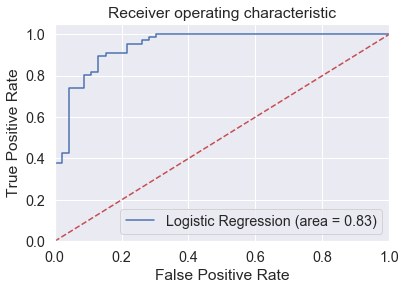

In [185]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, fit.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, fit.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<a id='conclusions'></a>
## 5. Conclusions

- I started with validating the source of the dataset, counting the columns and rows, and looking for null or missing values. The dataset is well organized and clean. I examined the columns and realized that some columns were dependent on all the mean columns so decided to remove them from the dataset.


- Class imbalance in our dataaset with 63% benign cases(357) and 37% malignant(212). We saw this distribution in our model too with the testing dataset. 

Number of cells diagnosed Benign : 357
Number of cells diagnosed Malignant : 212


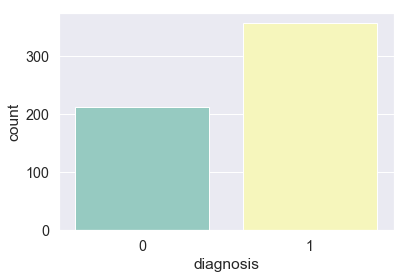

In [186]:
B, M = df.diagnosis.value_counts()
print("Number of cells diagnosed Benign : {}".format(B))
print("Number of cells diagnosed Malignant : {}".format(M))

ax = sns.countplot(x="diagnosis", data=df, palette="Set3")


- Density plots and histograms of the attributes show that the data is rightly skewed and follows a log normal distribution and even after normalization and scaling the data is still skewed.


- Since my sample size is <1000 I used Shapiro-Wilk test to check my null hypothesis which is that the data is normally distributed. Since in all the cases my p-values are less than 0.05, I will reject null hypothesis. Event the Anderson-Darling test rejects the null hypothesi.


- Next I used the D’Agostino’s K^2 test to check the skewness of the data. Since K^2 > 1 for the features, data is positively and highly skewed with a long right tail. This is evident in the density and histogram plots. 


- It is established that the data is not normally distributed and linear regression is not applicable. Logistic regression predicts probability between 0 and 1 of a categorical response variable. I used binary logitic regression as my categorical variable has two outcomes 'Benign' or 'Malignant'


- I used boxplots for visualizing the outliers and noticed that the dataset does not contain too many outiers. I chose 'area_mean' to calculate the Zscore to determine the number of outliers for that column. Since the number is not very high, I prefered removing those outliers from the dataset and took all the datapoints >2.5 to use it for the model.


- The residual plot shows that the points are not randomly dispersed, so we have to use a non-linear model

Text(0, 0.5, 'Residuals')

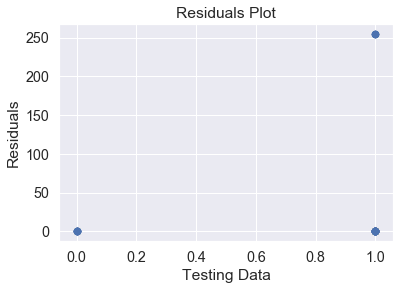

In [187]:
residuals = y_test - preds# calculate residuals
plt.scatter(model.predict(x_test), residuals,
            c='b', s=40, alpha=0.5) # plot x_test vs residuals
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

- I removed features that showed strong multicolinearity. My goal was to ensure that the model is a great fit by removing independent variables that show high correlation. The reason for this is that if there is a high correlation between two features then that would make it impossible to accurately test how a feature A is affecting Y (target) independent of feature B. Using the correlation matrix I find that perimeter and radius are highly dependent on each other, and concavity has a strong relationship with concave_points_mean, and compactness so I removed them. 

- **Radius, perimeter, and area** have strong correlations which is expected as perimeter = 2*pi*radius and area = pi*radius^2. So, we can remove perimeter and area from our dataset.

- Similary, **concavity, concave points, and compactness** show multicolinearity, since concavity has the strongest correlation with the other two, I will remove it. 

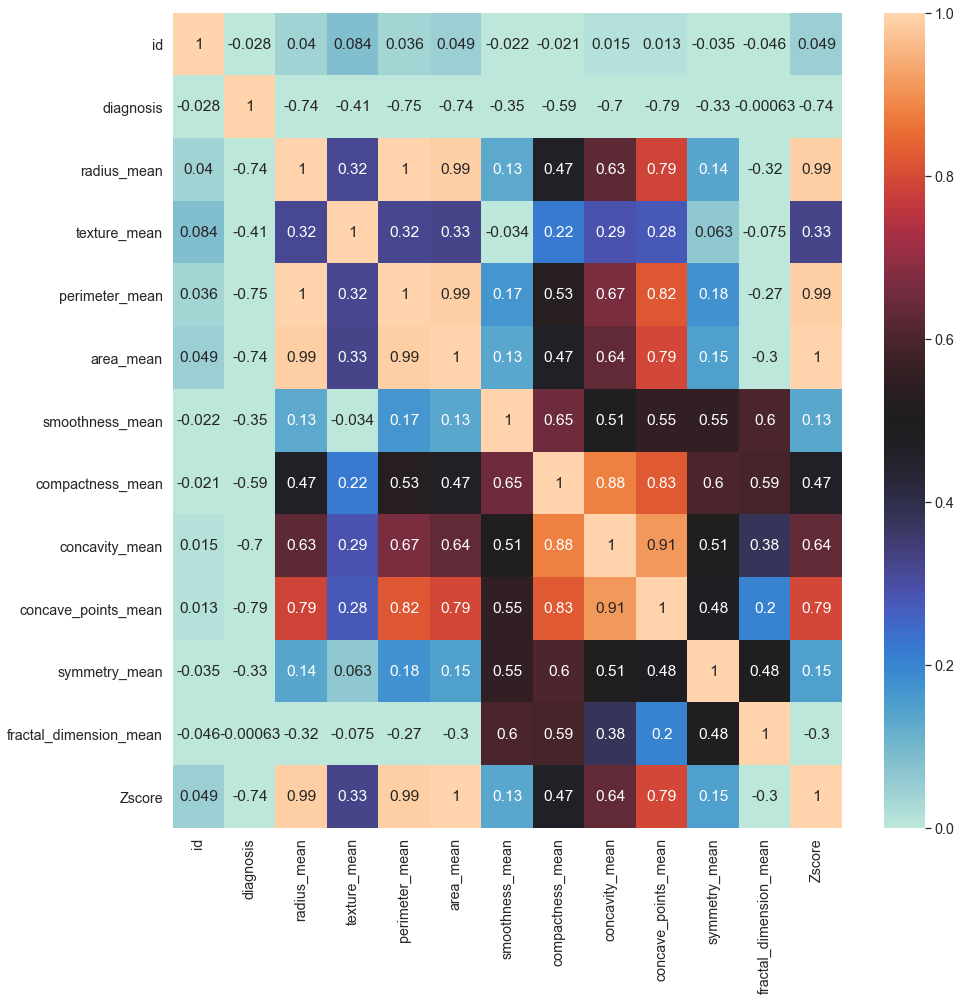

In [188]:
corr = df1.corr()# calc correlation on your subset
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(corr, 
            vmin=0, vmax=1, # setting min and max probability
            center=0.5, # changing to peach for high correlation, blue for low
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax, annot=True)
plt.show()

- H(0): No relationship between diagnosis and feature
- H(1): There exists a relationship between diagnosis and feature
- P-value threshold = 0.05


- I built my model using the other featuers and evaluated the p-values of the features using summary(). I find that area, smoothness, and symmetry have p-values > 0.05. In these cases, I rejected the null hypothesis. 

In [189]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  444
Model:                          Logit   Df Residuals:                      437
Method:                           MLE   Df Model:                            6
Date:                Tue, 20 Aug 2019   Pseudo R-squ.:                     inf
Time:                        20:57:48   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
texture_mean              -0.2968      0.061     -4.884      0.000      -0.416      -0.178
area_mean                 -0.0024      0.001     -1.764      0.078      -0.005       0.000
smoothness_mean          -32.6578     27.564     -1.185      0.236     -86.682      21.367
compactness_mean         -31.1681     13.314     -2.341      0.019     -57.262      -5.074
concave_points_mean      -92.3727     23.758     -3.888      0.000    -138.937     -45.809
symmetry_mean             -1.1119     10.032     -0.111      0.912     -20.774      18.550
fractal_dimension_mean   307.4852     66.031      4.657      0.000     178.066     436.904
==========================================================================================
"""

- My correct predictions are 66 + 30 and wrong predictions are 16. Based on the recall value in the classification report I can see that the model has accurately labeled 86% of the data.

****True Negative**** : 30

****False Positive**** : 16

****False Negative**** : 0

****True Positive**** : 66

In [190]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        46
           1       0.80      1.00      0.89        66

   micro avg       0.86      0.86      0.86       112
   macro avg       0.90      0.83      0.84       112
weighted avg       0.89      0.86      0.85       112



- Looking at the ROC plot, the area under the curve (AUC) is 0.83, so the model is highly capable of distinguishing and labeling the diagnosis. AUC is the measurement of separaability and higher the value better the model is at distingusing between patients with disease or no disease.

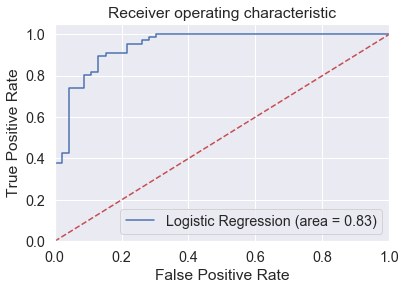

In [191]:
logit_roc_auc = roc_auc_score(y_test, fit.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, fit.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

- As part of the conclusion, I would like to increase the sample size and see how that affects the accuracy of this model.

In [225]:
X_train, X_test, Y_train, Y_test = train_test_split(df1_x, df1_y, # dataframes here,  
                                                   test_size=0.30,  # pull out 20% here, 
                                                   random_state=48)

model1 = LogisticRegression(solver='lbfgs')

fit1 = model1.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [229]:
preds1 = fit1.predict(X_test) # predict labels for x
preds1[1:6]

preds1 = np.reshape(preds1, (167,1))

In [210]:
preds1.shape

(167, 1)

In [233]:
print('Aaccuracy of logistic regression on the test data is: {:.3f}'
      .format(fit1.score(X_test, Y_test)))

print(confusion_matrix(Y_test, preds1))

print(precision_score(Y_test, preds1))

print(recall_score(Y_test, preds1))

print(accuracy_score(Y_test, preds1))

print(f1_score(Y_test, preds1))

Aaccuracy of logistic regression on the test data is: 0.892
[[ 46  13]
 [  5 103]]
0.8879310344827587
0.9537037037037037
0.8922155688622755
0.9196428571428572


- We can see that as we train more samples the accuracy of our model also increases.

<a id='references'></a>
## 6. References

1. https://towardsdatascience.com/precision-vs-recall-386cf9f89488

2. https://medium.com/@anishsingh20/logistic-regression-in-python-423c8d32838b

3. https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0

4. https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

5. https://www.scikit-yb.org/en/latest/api/regressor/residuals.html